In [569]:
import missingno
import pathlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [570]:
data_dir = pathlib.Path().absolute().parent.as_posix() + "/data/raw/train.csv"

df = pd.read_csv(data_dir)

In [361]:
df.shape

(45593, 20)

In [362]:
# drop ID & Delivery_pperson_id
df.drop(columns=["ID", "Delivery_person_ID"], inplace=True)

# rename columns
df.rename(
    columns={"Delivery_person_Age": "Age", "Delivery_person_Ratings": "Ratings"},
    inplace=True,
)

In [363]:
df.sample(3)

,Age,Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
36714,27,4.1,12.906229,77.596791,13.016229,77.706791,31-03-2022,17:25:00,17:35:00,conditions Fog,Medium,1,Drinks,scooter,1,No,Metropolitian,(min) 32
12236,26,4.8,23.214294,77.435361,23.284294,77.505361,12-02-2022,19:55:00,20:00:00,conditions Windy,Jam,2,Snack,scooter,0,No,Metropolitian,(min) 17
5191,21,4.6,11.022298,76.998349,11.052298,77.028349,17-03-2022,20:35:00,20:40:00,conditions Fog,Jam,0,Meal,motorcycle,1,No,Metropolitian,(min) 25


In [364]:
df.shape

(45593, 18)

<font color = 'orange'>

#### <b> Order_Date

- change data type


In [440]:
df["Order_Date"] = pd.to_datetime(df["Order_Date"], format="%d-%m-%Y")

<font color = 'orange'>

#### <b> Time_Orderd

- handle NaN values
- change data type


In [365]:
# data is of March-23
print(
    f"Start Date: {df['Order_Date'].min()} \n\
End Date: {df['Order_Date'].max()}"
)

Start Date: 01-03-2022 
End Date: 31-03-2022


In [366]:
df["Time_Orderd"] = df["Time_Orderd"].replace("NaN ", np.nan)
df["Time_Orderd"] = pd.to_datetime(df["Time_Orderd"], format="%H:%M:%S").dt.time

In [367]:
# handle NaN

<font color = 'orange'>

#### <b> Time_Order_picked

- change data type


In [368]:
df["Time_Order_picked"] = pd.to_datetime(
    df["Time_Order_picked"], format="%H:%M:%S"
).dt.time

<font color = 'orange'>

#### <b> Vehicle_condition

- change data type


In [369]:
df["Vehicle_condition"] = df["Vehicle_condition"].astype("category")

<font color = 'orange'>

#### <b> City

- handle NaN values
- handle extra space at suffix
- change data type


In [370]:
print(
    f"Unique Valeus: {df['City'].unique()} \n\nNaN Count: {df[df['City'] == 'NaN '].shape[0]} \n\nValue Count: {df['City'].value_counts()}"
)

Unique Valeus: ['Urban ' 'Metropolitian ' 'Semi-Urban ' 'NaN '] 

NaN Count: 1200 

Value Count: City
Metropolitian     34093
Urban             10136
NaN                1200
Semi-Urban          164
Name: count, dtype: int64


In [371]:
# fix extra spaces
df["City"] = list(map(lambda x: x.strip(), df["City"]))

df["City"].unique()

array(['Urban', 'Metropolitian', 'Semi-Urban', 'NaN'], dtype=object)

In [372]:
# fix 'NaN' with np.nan
df["City"] = df["City"].replace("NaN", np.nan)

In [373]:
df["City"].isnull().sum()

np.int64(1200)

In [374]:
# NaN replaced by mode
df["City"] = df["City"].fillna(value=df["City"].value_counts().index[0])

<font color = 'orange'>

#### <b> Festival

- handle NaN
- handle extra space at suffix
- change data type


In [375]:
print(
    f"Unique Valeus: {df['Festival'].unique()} \n\nNaN Count: {df[df['Festival'] == 'NaN '].shape[0]} \n\nValue Count: {df['Festival'].value_counts()}"
)

Unique Valeus: ['No ' 'Yes ' 'NaN '] 

NaN Count: 228 

Value Count: Festival
No      44469
Yes       896
NaN       228
Name: count, dtype: int64


In [376]:
# fix the extra space
df["Festival"] = list(map(lambda x: x.strip(), df["Festival"]))
print(f"Unique value: {df['Festival'].unique()}")

# fix 'NaN' with np.nan
df["Festival"] = df["Festival"].replace("NaN", np.nan)
print(f"Value Count: {df['Festival'].isnull().sum()}")

Unique value: ['No' 'Yes' 'NaN']
Value Count: 228


In [377]:
# NaN replaced by mode of column
df["Festival"] = df["Festival"].fillna(df["Festival"].value_counts().index[0])

In [378]:
df["Festival"].value_counts()

Festival
No     44697
Yes      896
Name: count, dtype: int64

<font color = 'orange'>

#### <b> multiple_deliveries

- handle NaN
- change data type


In [379]:
df["multiple_deliveries"].unique()

array(['0', '1', '3', 'NaN ', '2'], dtype=object)

In [380]:
df["multiple_deliveries"].value_counts()

multiple_deliveries
1       28159
0       14095
2        1985
NaN       993
3         361
Name: count, dtype: int64

In [381]:
# fix 'NaN ' with np.nan
df["multiple_deliveries"] = df["multiple_deliveries"].replace("NaN ", np.nan)
print(f"Value Count: {df['multiple_deliveries'].isnull().sum()}")

Value Count: 993


In [382]:
# fixing data type
df["multiple_deliveries"] = df["multiple_deliveries"].astype("Int64")

In [383]:
# as we dont have any clear explanation we'll convert 1,2,3 as 1 which means multiple deliveries
# and 0 means single delivery
df["multiple_deliveries"] = df["multiple_deliveries"].apply(
    lambda x: x if x == 0 or np.isnan(x) else 1
)

In [384]:
df["multiple_deliveries"].unique()

array([ 0.,  1., nan])

In [385]:
df["multiple_deliveries"].value_counts()

multiple_deliveries
1.0    30505
0.0    14095
Name: count, dtype: int64

In [386]:
df["multiple_deliveries"].isna().sum()

np.int64(993)

In [387]:
df["multiple_deliveries"].fillna(value=1, inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_18160\4235229862.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["multiple_deliveries"].fillna(value=1, inplace=True)


In [388]:
df["multiple_deliveries"].value_counts()

multiple_deliveries
1.0    31498
0.0    14095
Name: count, dtype: int64

<font color = 'orange'>

#### <b> Type_of_vehicle

- handle extra space at suffix
- change data type


In [389]:
df["Type_of_vehicle"].unique()

array(['motorcycle ', 'scooter ', 'electric_scooter ', 'bicycle '],
      dtype=object)

In [390]:
# fix the extra space
df["Type_of_vehicle"] = list(map(lambda x: x.strip(), df["Type_of_vehicle"]))
print(f"Unique value: {df['Type_of_vehicle'].unique()}")

Unique value: ['motorcycle' 'scooter' 'electric_scooter' 'bicycle']


<font color = 'orange'>

#### <b> Type_of_order

- handle extra space at suffix
- change data type


In [391]:
df["Type_of_order"].unique()

array(['Snack ', 'Drinks ', 'Buffet ', 'Meal '], dtype=object)

In [392]:
# fix the extra space
df["Type_of_order"] = list(map(lambda x: x.strip(), df["Type_of_order"]))
print(f"Unique value: {df['Type_of_order'].unique()}")

Unique value: ['Snack' 'Drinks' 'Buffet' 'Meal']


<font color = 'orange'>

#### <b> Road_traffic_density

- handle NaN
- handle extra space at suffix
- change data type


In [393]:
df["Road_traffic_density"].unique()

array(['High ', 'Jam ', 'Low ', 'Medium ', 'NaN '], dtype=object)

In [394]:
df["Road_traffic_density"].value_counts()

Road_traffic_density
Low        15477
Jam        14143
Medium     10947
High        4425
NaN          601
Name: count, dtype: int64

In [395]:
# fix the extra space
df["Road_traffic_density"] = list(map(lambda x: x.strip(), df["Road_traffic_density"]))
print(f"Unique value: {df['Road_traffic_density'].unique()}")

# fix 'NaN' with np.nan
df["Road_traffic_density"] = df["Road_traffic_density"].replace("NaN", np.nan)
print(f"Value Count: {df['Road_traffic_density'].isnull().sum()}")

Unique value: ['High' 'Jam' 'Low' 'Medium' 'NaN']
Value Count: 601


In [396]:
df["Road_traffic_density"] = df["Road_traffic_density"].fillna(value="Low")

In [397]:
df["Road_traffic_density"].value_counts()

Road_traffic_density
Low       16078
Jam       14143
Medium    10947
High       4425
Name: count, dtype: int64

<font color = 'orange'>

#### <b> Delivery_person_Rattings

- handle NaN
- change data type


In [398]:
df["Ratings"].unique()

array(['4.9', '4.5', '4.4', '4.7', '4.6', '4.8', '4.2', '4.3', '4', '4.1',
       '5', '3.5', 'NaN ', '3.8', '3.9', '3.7', '2.6', '2.5', '3.6',
       '3.1', '2.7', '1', '3.2', '3.3', '6', '3.4', '2.8', '2.9', '3'],
      dtype=object)

In [399]:
df[df["Ratings"] == "NaN "].shape[0]

1908

In [400]:
# fixing data type
df["Ratings"] = df["Ratings"].astype("float")

In [401]:
df["Ratings"].isna().sum()

np.int64(1908)

In [402]:
print(
    f"Min: {df['Ratings'].min()} \
      \nMax: {df['Ratings'].max()} \
      \nMean: {df['Ratings'].mean()} \
      \nMedian: {df['Ratings'].median()}"
)

Min: 1.0       
Max: 6.0       
Mean: 4.633780473846858       
Median: 4.7


In [403]:
df[df["Ratings"] > 5].shape[1]

18

[]

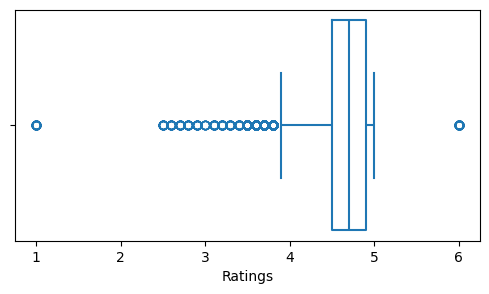

In [404]:
# box plot
plt.figure(figsize=(6, 3))
sns.boxplot(df, x=df["Ratings"].astype("float"), fill=False)
plt.plot()

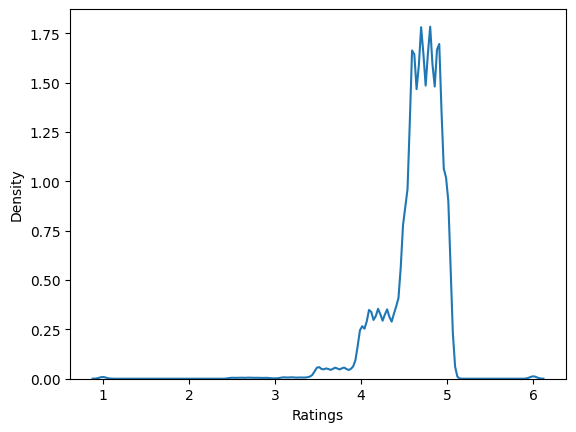

In [405]:
sns.kdeplot(df["Ratings"])
plt.show()

In [406]:
# replace 6 ratting with median
df["Ratings"] = df["Ratings"].replace(6, 4.7)

<font color = 'orange'>

#### <b> Age

- handle NaN
- change data type


In [407]:
df["Age"].unique()

array(['37', '34', '23', '38', '32', '22', '33', '35', '36', '21', '24',
       '29', '25', '31', '27', '26', '20', 'NaN ', '28', '39', '30', '15',
       '50'], dtype=object)

In [408]:
# 'NaN ' is present in Age column - 1854
df[df["Age"] == "NaN "].shape[0]

1854

In [409]:
# fixing NaN
df["Age"] = df["Age"].replace("NaN ", np.nan)

# fixing data type
df["Age"] = df["Age"].astype("Int64")

In [410]:
df["Age"].isnull().sum()

np.int64(1854)

In [411]:
print(
    f"Min: {df['Age'].min()} \
      \nMax: {df['Age'].max()} \
      \nMean: {df['Age'].mean()} \
      \nMedian: {df['Age'].median()}"
)

Min: 15       
Max: 50       
Mean: 29.567136880129862       
Median: 30.0


[]

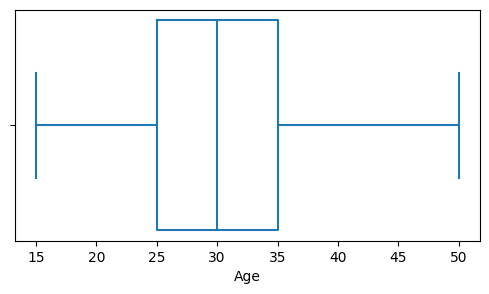

In [412]:
# box plot
plt.figure(figsize=(6, 3))
sns.boxplot(df, x=df["Age"], fill=False)
plt.plot()

<font color = 'orange'>

#### <b> Weatherconditions

- handle Nan
- change data type


In [413]:
df["Weatherconditions"].unique()

array(['conditions Sunny', 'conditions Stormy', 'conditions Sandstorms',
       'conditions Cloudy', 'conditions Fog', 'conditions Windy',
       'conditions NaN'], dtype=object)

In [414]:
df["Weatherconditions"].value_counts()

Weatherconditions
conditions Fog           7654
conditions Stormy        7586
conditions Cloudy        7536
conditions Sandstorms    7495
conditions Windy         7422
conditions Sunny         7284
conditions NaN            616
Name: count, dtype: int64

In [415]:
df["Weatherconditions"].isnull().sum()

np.int64(0)

In [416]:
# fixing category names
df["Weatherconditions"] = df["Weatherconditions"].apply(lambda x: x.split(" ")[-1])

# fixing NaN
df["Weatherconditions"] = df["Weatherconditions"].replace("NaN", np.nan)

In [417]:
df["Weatherconditions"].value_counts()

Weatherconditions
Fog           7654
Stormy        7586
Cloudy        7536
Sandstorms    7495
Windy         7422
Sunny         7284
Name: count, dtype: int64

In [418]:
df["Weatherconditions"] = df["Weatherconditions"].fillna(value="Fog")

In [419]:
# replace NaN with Mode of Weatherconditions
df["Weatherconditions"].value_counts()

Weatherconditions
Fog           8270
Stormy        7586
Cloudy        7536
Sandstorms    7495
Windy         7422
Sunny         7284
Name: count, dtype: int64

In [207]:
# % of NaN values
round(df.isnull().mean() * 100, 2)

Age                            4.07
Ratings                        4.18
Restaurant_latitude            0.00
Restaurant_longitude           0.00
Delivery_location_latitude     0.00
Delivery_location_longitude    0.00
Order_Date                     0.00
Time_Orderd                    3.80
Time_Order_picked              0.00
Weatherconditions              0.00
Road_traffic_density           0.00
Vehicle_condition              0.00
Type_of_order                  0.00
Type_of_vehicle                0.00
multiple_deliveries            0.00
Festival                       0.00
City                           0.00
Time_taken(min)                0.00
dtype: float64

<Axes: >

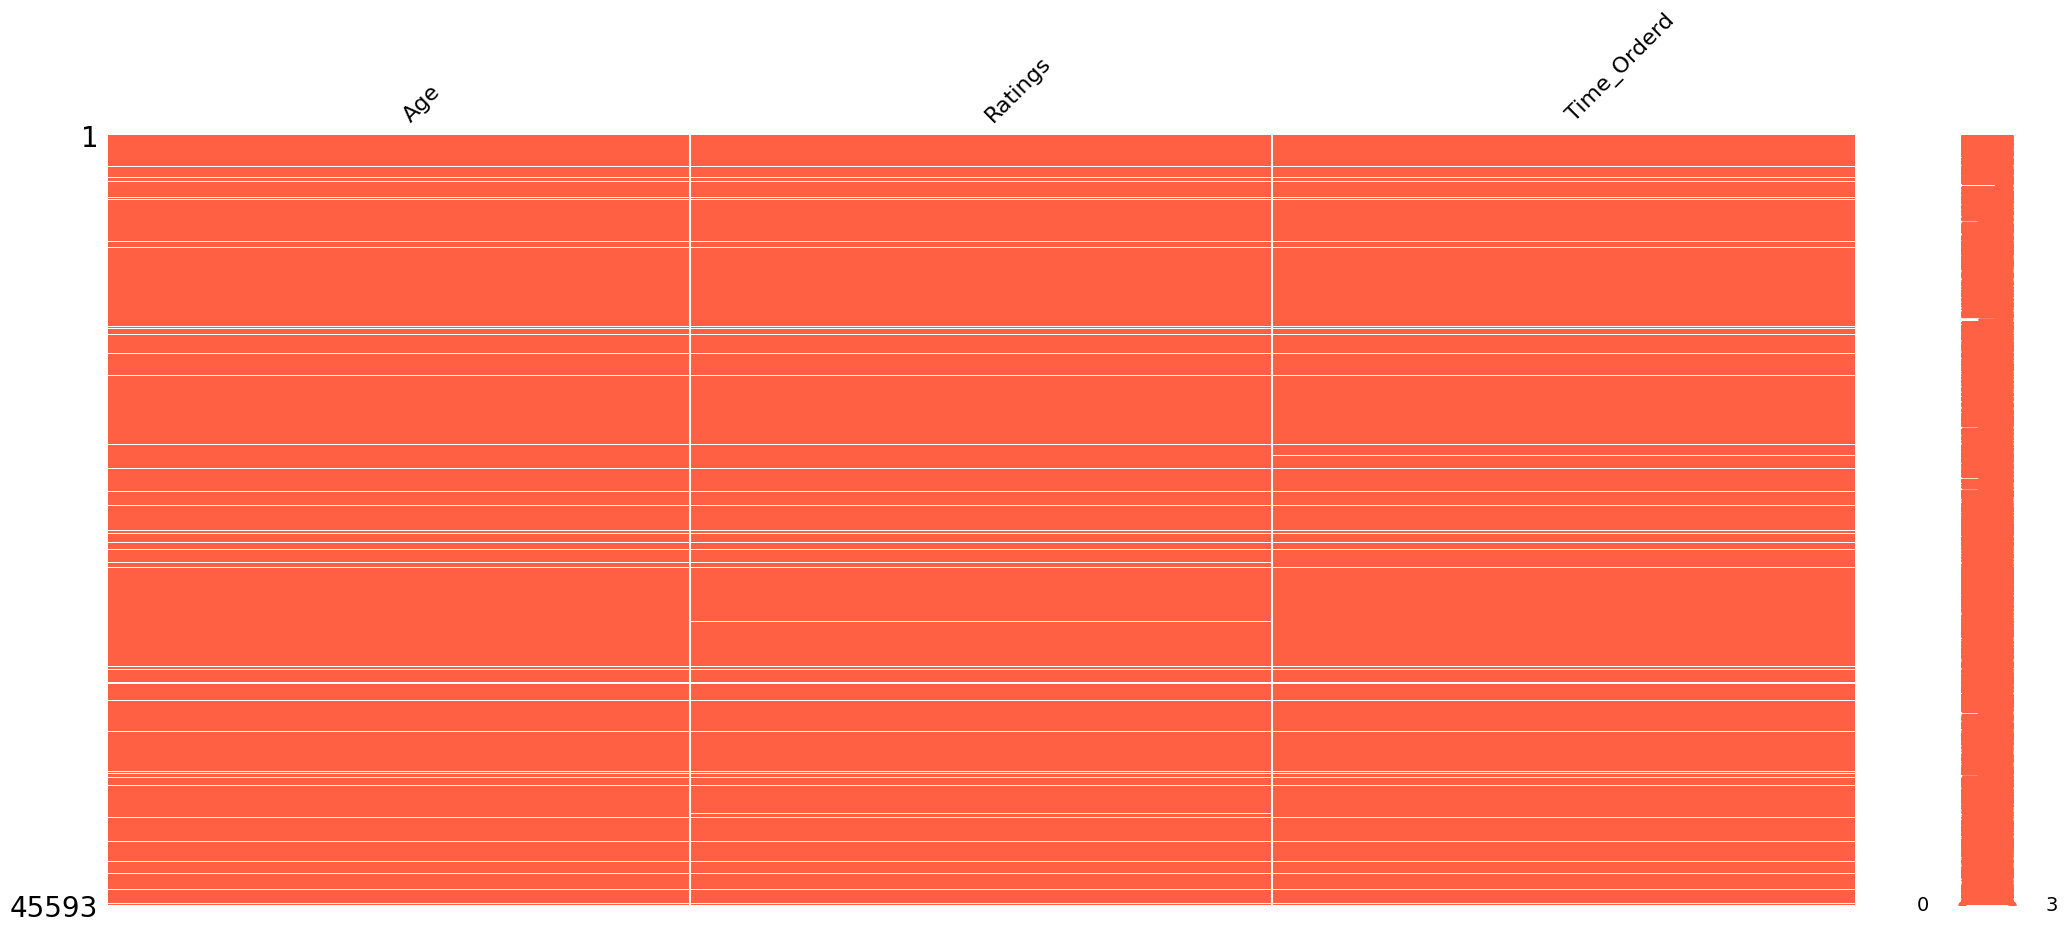

In [208]:
# Age & Rating seems very correlated columns
%matplotlib inline
missingno.matrix(df.loc[:,['Age', 'Ratings', 'Time_Orderd']], color=(1, 0.38, 0.27))

<Axes: >

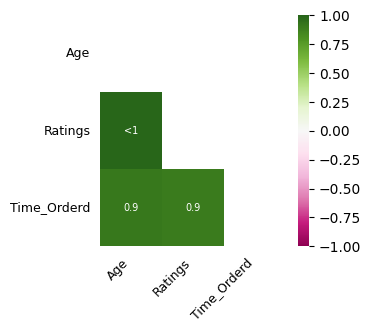

In [220]:
missingno.heatmap(df, cmap="PiYG", figsize=(3, 3), fontsize=9)

In [209]:
# sort the df for filling Order_Date with foward fill & backward fill
df.sort_values(by="Order_Date", ascending=True, inplace=True)
df.reset_index(inplace=True, drop=True)

In [224]:
df[(df["Order_Date"] == "01-03-2022") & (df["Time_Orderd"].isna())]

,Age,Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
3,50,4.7,11.001852,76.976268,11.061852,77.036268,01-03-2022,NaT,17:50:00,NaN,Low,3,Meal,electric_scooter,0.0,No,Metropolitian,(min) 16
61,<NA>,NaN,13.026279,80.174568,13.086279,80.234568,01-03-2022,NaT,20:00:00,Sandstorms,Jam,0,Drinks,motorcycle,1.0,No,Metropolitian,(min) 27
103,<NA>,NaN,-12.933284,-77.615428,12.953284,77.635428,01-03-2022,NaT,11:55:00,NaN,Low,3,Buffet,scooter,1.0,No,Metropolitian,(min) 34
117,<NA>,NaN,-18.569156,73.774723,18.589156,73.794723,01-03-2022,NaT,09:55:00,Stormy,Low,1,Meal,scooter,1.0,No,Urban,(min) 22
136,<NA>,NaN,18.536562,73.896485,18.596562,73.956485,01-03-2022,NaT,20:50:00,Windy,Jam,1,Snack,motorcycle,1.0,No,Metropolitian,(min) 31
171,<NA>,NaN,17.438263,78.397865,17.458263,78.417865,01-03-2022,NaT,10:35:00,Stormy,Low,1,Meal,scooter,1.0,No,Metropolitian,(min) 22
172,<NA>,NaN,0.000000,0.000000,0.060000,0.060000,01-03-2022,NaT,22:05:00,NaN,Low,3,Meal,scooter,1.0,No,Metropolitian,(min) 37
193,<NA>,NaN,13.086438,80.220672,13.136439,80.270672,01-03-2022,NaT,23:10:00,Sandstorms,Low,1,Meal,scooter,1.0,No,Metropolitian,(min) 21
204,<NA>,NaN,0.000000,0.000000,0.030000,0.030000,01-03-2022,NaT,21:55:00,Stormy,Jam,2,Meal,scooter,1.0,No,Metropolitian,(min) 30
207,<NA>,NaN,22.311844,73.165081,22.371844,73.225081,01-03-2022,NaT,22:45:00,Cloudy,Low,2,Meal,scooter,0.0,No,Urban,(min) 18


In [421]:
# Hypothesis Testing
# One-way ANOVA
import statsmodels.formula.api as smf

nonna_df = df.dropna()
# Perform one-way ANOVA
model = smf.ols(
    formula="Age ~ Weatherconditions + Road_traffic_density + Vehicle_condition + Type_of_order + Type_of_vehicle + Festival + City",
    data=nonna_df,
)
result = model.fit()

# Print the ANOVA table
print(result.summary())

# Extract the coefficients and other important values, rounding them
coefficients = result.params.round(2)  # Rounding the coefficients to 2 decimal places
pvalues = result.pvalues.round(4)  # Rounding the p-values to 4 decimal places
rsquared = round(result.rsquared, 3)  # Rounding R-squared to 3 decimal places

# Displaying rounded values manually
print("Coefficients (rounded):")
print(coefficients)
print("\nP-values (rounded):")
print(pvalues)
print(f"\nR-squared (rounded): {rsquared}")

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     20.89
Date:                Sat, 07 Sep 2024   Prob (F-statistic):           1.86e-68
Time:                        12:55:57   Log-Likelihood:            -1.3800e+05
No. Observations:               43594   AIC:                         2.760e+05
Df Residuals:                   43575   BIC:                         2.762e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

[]

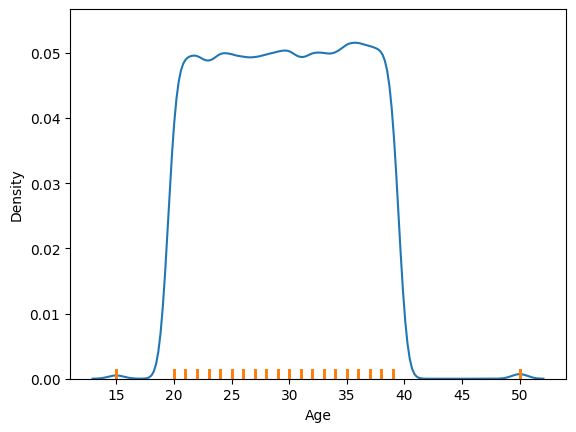

In [219]:
# dist of Age
sns.kdeplot(df["Age"])
sns.rugplot(df["Age"])
plt.plot()

[]

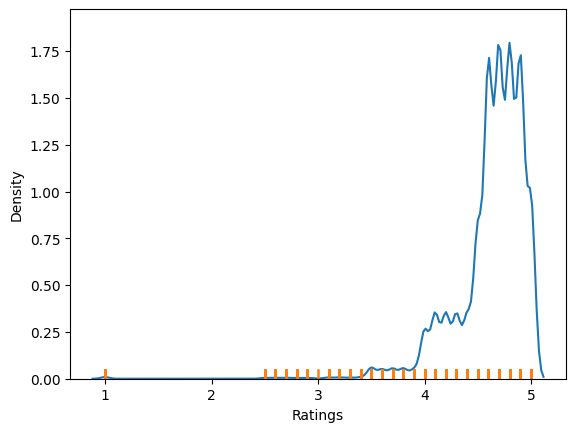

In [217]:
# dist of rating
sns.kdeplot(df["Ratings"])
sns.rugplot(df["Ratings"])
plt.plot()

[]

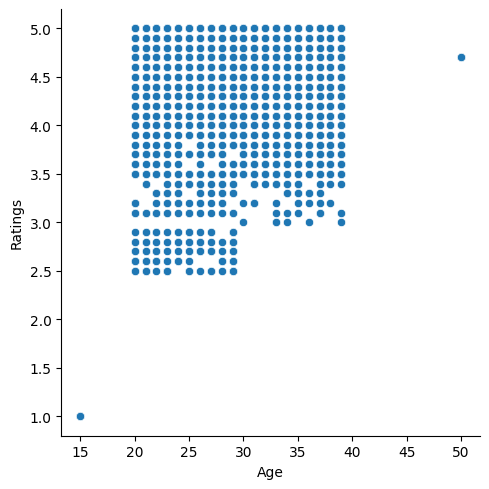

In [218]:
# rel b/w age & rating
sns.relplot(x=df["Age"], y=df["Ratings"], kind="scatter")
plt.plot()

# Feature Engineering

"restaurant - delivery location" latitude & longitude

- Euclidean dist
- haversine dist
- manhattan dist
- estimate delivery time (assume 30 kmph)

time ordered & time order picked

- time lag
- is weekend
- is rush hour (i.e lunch or dinner time)

order date

- hour
- day of week
- month
- quarter
- year


In [475]:
from math import radians, sin, cos, sqrt, atan2

In [563]:
# Convert degrees to radians for Haversine calculation
def haversine(df):
    lat1, lon1, lat2, lon2 = (
        df["Restaurant_latitude"],
        df["Restaurant_longitude"],
        df["Delivery_location_latitude"],
        df["Delivery_location_longitude"],
    )
    R = 6371.0  # Earth radius in kilometers
    dlat = radians(abs(lat2) - abs(lat1))
    dlon = radians(abs(lon2) - abs(lon1))

    a = (
        sin(dlat / 2) ** 2
        + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon / 2) ** 2
    )
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    return round(R * c, 3)  # Distance in kilometers

In [564]:
df["haversine_dist"] = df.apply(haversine, axis=1)

In [567]:
lat_lon = df[df["haversine_dist"] > 20].loc[
    :,
    [
        "Restaurant_latitude",
        "Restaurant_longitude",
        "Delivery_location_latitude",
        "Delivery_location_longitude",
        "Order_Date",
        "Time_Orderd",
        "Time_Order_picked",
        "Time_taken(min)",
        "haversine_dist",
    ],
]

In [568]:
lat_lon

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Time_taken(min),haversine_dist
1,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,(min) 33,20.184
7,12.352058,76.606650,12.482058,76.736650,2022-03-14,17:25:00,17:30:00,(min) 32,20.205
22,12.986047,80.218114,13.116047,80.348114,2022-03-27,19:30:00,19:45:00,(min) 39,20.181
107,12.284747,76.625861,12.414747,76.755861,2022-03-23,20:10:00,20:20:00,(min) 42,20.208
109,11.000762,76.981876,11.130762,77.111876,2022-03-08,20:35:00,20:45:00,(min) 38,20.254
...,...,...,...,...,...,...,...,...,...
45494,0.000000,0.000000,0.130000,0.130000,2022-02-14,19:35:00,19:45:00,(min) 34,20.443
45513,30.335259,78.053162,30.475259,78.193162,2022-02-16,18:10:00,18:20:00,(min) 41,20.557
45531,0.000000,0.000000,0.130000,0.130000,2022-03-10,00:00:00,00:10:00,(min) 22,20.443
45576,0.000000,0.000000,0.130000,0.130000,2022-04-04,17:25:00,17:30:00,(min) 48,20.443


In [ ]:
# Euclidean Distance (assuming flat plane, less accurate for real-world distances)
# def euclidean(lat1, lon1, lat2, lon2):
#     return sqrt((lat2 - lat1) ** 2 + (lon2 - lon1) ** 2)

In [ ]:
# Manhattan Distance (approximation of a grid-like path)
def manhattan(lat1, lon1, lat2, lon2):
    return abs(lat2 - lat1) + abs(lon2 - lon1)

In [491]:
# Estimated Delivery Time assuming 30 km/h
def estimated_delivery_time(df):
    distance_km = df["haversine_dist"]
    return distance_km / 30  # Time in hours

In [492]:
# estimated time (in min)
df["estm_time"] = df.apply(estimated_delivery_time, axis=1)
df["estm_time"] = round(df["estm_time"] * 60, 3)

<Axes: xlabel='estm_time', ylabel='Density'>

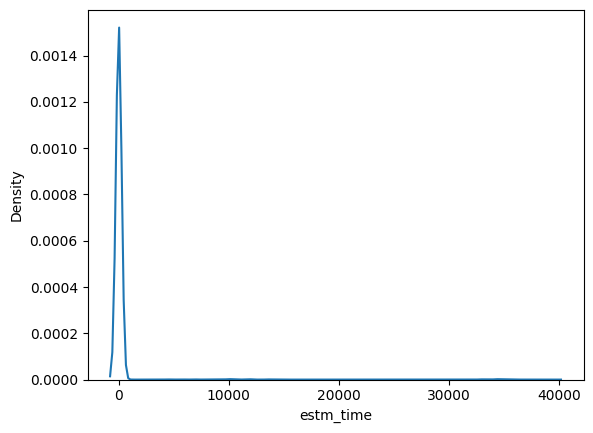

In [541]:
sns.kdeplot(df["estm_time"])

In [511]:
# get ordered_hour, ordered_min, picked_hour, picked_min
df["ordered_hour"] = df["Time_Orderd"].apply(lambda x: x.hour)
df["ordered_min"] = df["Time_Orderd"].apply(lambda x: x.minute)
df["picked_hour"] = df["Time_Order_picked"].apply(lambda x: x.hour)
df["picked_min"] = df["Time_Order_picked"].apply(lambda x: x.minute)

In [530]:
# ese order bhi he jo 12 bje se phle order hue ho or 12 k baad pickup hue ho
df["time_lag"] = np.where(
    (df["picked_hour"] - df["ordered_hour"]) < 0,
    (23 + df["picked_hour"] - df["ordered_hour"]) * 60
    + (60 + df["picked_min"] - df["ordered_min"]),
    (df["picked_hour"] - df["ordered_hour"]) * 60
    + (df["picked_min"] - df["ordered_min"]),
)

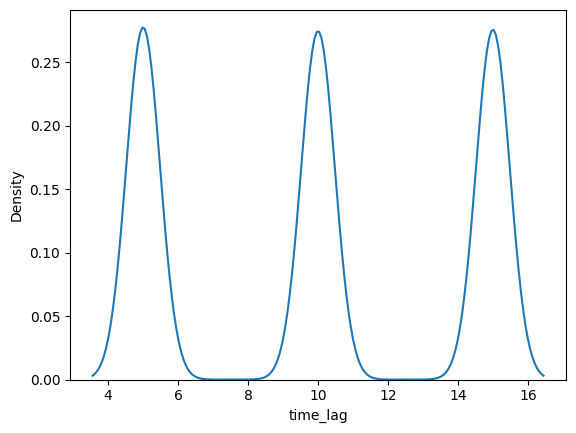

In [540]:
sns.kdeplot(df["time_lag"])
plt.show()

In [457]:
# extract hour
df["hour"] = df["Time_Orderd"].apply(lambda x: x.hour)

In [452]:
# get week day
df["day"] = df["Order_Date"].dt.strftime("%A")

In [463]:
# is_weekend
df["is_weekend"] = df["day"].apply(lambda x: 1 if x in ["Saturday", "Sunday"] else 0)

In [470]:
# 5. Rush Hour (1 if order time is between 11:00-14:00 or 19:00-23:00, else 0)
df["is_rush"] = df["hour"].apply(
    lambda x: 1 if (11 <= x <= 14) or (19 <= x <= 23) else 0
)

<font color = 'orange'>

## <b> Script & Data Testing

In [54]:
import pathlib

home_dir = pathlib.Path().absolute().parent.as_posix()
print(home_dir)

if pathlib.Path(f"{home_dir}/notebooks/sample.txt").exists() :
    pathlib.Path(f"{home_dir}/notebooks/sample.txt").unlink()


e:/MLOps/delivery-time-estm


In [26]:
import pathlib
import pandas as pd

pd.set_option('display.max_columns', None)

train_df = pd.read_csv(f"{pathlib.Path().absolute().parent.as_posix()}/data/processed/processed_train.csv")
test_df = pd.read_csv(f"{pathlib.Path().absolute().parent.as_posix()}/data/processed/processed_test.csv")

In [29]:
test_df.shape

(8714, 18)

In [27]:
pd.DataFrame(train_df.dtypes).reset_index().iloc[:, [1,0]]

,0,index
0,int64,Age
1,float64,Ratings
2,int64,Weatherconditions
3,int64,Road_traffic_density
4,int64,Vehicle_condition
5,int64,Type_of_order
6,int64,Type_of_vehicle
7,int64,multiple_deliveries
8,int64,Festival
9,int64,City


In [ ]:
'int64',	'Age'
'float64',	'Ratings'
'int64',	'Weatherconditions'
'int64',	'Road_traffic_density'
'int64',	'Vehicle_condition'
'int64',	'Type_of_order'
'int64',	'Type_of_vehicle'
'float64',	'multiple_deliveries'
'int64',	'Festival'
'int64',	'City'
'int64',	'Time_taken(min)'
'float64',	'haversine_dist'
'float64',	'estm_time'
'float64',	'time_lag'
'float64',	'hour'
'int64',	'day'
'int64',	'is_weekend'
'int64',	'is_rush'

In [57]:
train_df.dtypes

Age                       int64
Ratings                 float64
Weatherconditions         int64
Road_traffic_density      int64
Vehicle_condition         int64
Type_of_order             int64
Type_of_vehicle           int64
multiple_deliveries     float64
Festival                  int64
City                      int64
Time_taken(min)           int64
haversine_dist          float64
estm_time               float64
time_lag                float64
hour                    float64
day                       int64
is_weekend                int64
is_rush                   int64
dtype: object

In [58]:
train_df['City'] = train_df['City'].astype('category')

In [63]:
train_df.shape

(32691, 18)

In [64]:
test_df.shape

(10903, 18)

In [24]:
train_df['Time_taken(min)'] = train_df['Time_taken(min)'].apply(lambda x: x.split(' ')[-1]).astype('int')

In [36]:
train_df.shape

(32691, 18)

In [37]:
test_df.shape

(10903, 29)

In [41]:
test_df.isna().sum()

Age                            0
Ratings                        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
haversine_dist                 0
estm_time                      0
ordered_hour                   0
ordered_min                    0
picked_hour                    0
picked_min                     0
time_lag                       0
hour                           0
day                            0
is_weekend                     0
is_rush                        0
dtype: int64

In [27]:
train_df.dtypes

Age                       int64
Ratings                 float64
Weatherconditions         int64
Road_traffic_density      int64
Vehicle_condition         int64
Type_of_order             int64
Type_of_vehicle           int64
multiple_deliveries     float64
Festival                  int64
City                      int64
Time_taken(min)           int64
haversine_dist          float64
estm_time               float64
ordered_hour            float64
ordered_min             float64
picked_hour               int64
picked_min                int64
time_lag                float64
hour                    float64
day                      object
is_weekend                int64
is_rush                   int64
dtype: object

In [2]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

col_names = [
    "Weatherconditions",
    "Road_traffic_density",
    "City",
    "Festival",
    "Type_of_vehicle",
    "Type_of_order",
    "Vehicle_condition",
]

le = LabelEncoder()

transformer = ColumnTransformer([('label_encoder', le, col_names)])
encoded_data = transformer.fit_transform(train_df)

TypeError: fit_transform() takes 2 positional arguments but 3 were given

In [6]:
train_df.dtypes

Age                            float64
Ratings                        float64
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Order_Date                      object
Time_Orderd                     object
Time_Order_picked               object
Weatherconditions               object
Road_traffic_density            object
Vehicle_condition                int64
Type_of_order                   object
Type_of_vehicle                 object
multiple_deliveries            float64
Festival                        object
City                            object
Time_taken(min)                 object
haversine_dist                 float64
estm_time                      float64
ordered_hour                   float64
ordered_min                    float64
picked_hour                      int64
picked_min                       int64
time_lag                       float64
hour                     

In [18]:
train_df.shape

(34194, 29)

In [15]:
x = train_df.dropna()

In [17]:
x.shape

(32691, 29)

In [19]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(train_df['City'])

train_df['City'] = label_encoder.transform(train_df['City'])

In [24]:
train_df['City'].value_counts()

City
Metropolitian    26451
Urban             7614
Semi-Urban         129
Name: count, dtype: int64

In [22]:
train_df['City'].value_counts()

City
0    26451
2     7614
1      129
Name: count, dtype: int64

In [25]:
test_df['City'] = label_encoder.transform(test_df['City'])

In [28]:
test_df['City'].value_counts()

City
Metropolitian    8842
Urban            2522
Semi-Urban         35
Name: count, dtype: int64

In [26]:
test_df['City'].value_counts()

City
0    8842
2    2522
1      35
Name: count, dtype: int64

In [16]:
x.isna().sum()

Age                            0
Ratings                        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
haversine_dist                 0
estm_time                      0
ordered_hour                   0
ordered_min                    0
picked_hour                    0
picked_min                     0
time_lag                       0
hour                           0
day                            0
is_weekend                     0
is_rush                        0
dtype: int64

In [586]:
round(df.isna().mean() * 100, 2)

Age                            4.07
Ratings                        4.19
Restaurant_latitude            0.00
Restaurant_longitude           0.00
Delivery_location_latitude     0.00
Delivery_location_longitude    0.00
Order_Date                     0.00
Time_Orderd                    3.79
Time_Order_picked              0.00
Weatherconditions              1.33
Road_traffic_density           1.29
Vehicle_condition              0.00
Type_of_order                  0.00
Type_of_vehicle                0.00
multiple_deliveries            2.19
Festival                       0.49
City                           2.59
Time_taken(min)                0.00
dtype: float64